In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


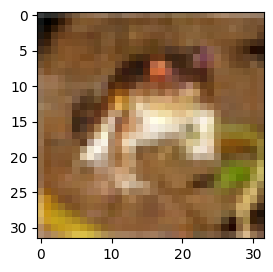

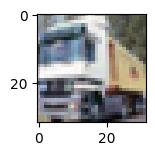

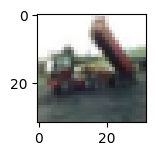

In [2]:
n=3
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(330+1+i)
    plt.imshow(train_X[i])
    plt.show()

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from tensorflow.keras import layers, models

In [5]:
from keras.constraints import max_norm
from keras.optimizers import SGD
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

In [6]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')

train_X=train_X/255.0
test_X=test_X/255.0

In [7]:
train_Y_categorical = to_categorical(train_Y)
test_Y_categorical = to_categorical(test_Y)
num_classes = test_Y_categorical.shape[1]

In [8]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),padding='same',activation='relu',kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=max_norm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=max_norm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
sgd = SGD(learning_rate=0.01, momentum=0.9, weight_decay=0.01/25, nesterov=False)

In [10]:
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                        

In [12]:
model.fit(train_X, train_Y_categorical, validation_data=(test_X, test_Y_categorical), epochs=10, batch_size=32)


Epoch 1/10
1563/1563 [==============================] - 254s 162ms/step - loss: 1.7701 - accuracy: 0.3568 - val_loss: 1.5416 - val_accuracy: 0.4517
Epoch 2/10
1563/1563 [==============================] - 265s 170ms/step - loss: 1.4082 - accuracy: 0.4941 - val_loss: 1.2741 - val_accuracy: 0.5505
Epoch 3/10
1563/1563 [==============================] - 257s 165ms/step - loss: 1.2205 - accuracy: 0.5656 - val_loss: 1.1115 - val_accuracy: 0.6084
Epoch 4/10
1563/1563 [==============================] - 266s 170ms/step - loss: 1.0786 - accuracy: 0.6170 - val_loss: 1.0882 - val_accuracy: 0.6233
Epoch 5/10
1563/1563 [==============================] - 257s 164ms/step - loss: 0.9604 - accuracy: 0.6593 - val_loss: 1.0023 - val_accuracy: 0.6495
Epoch 6/10
1563/1563 [==============================] - 258s 165ms/step - loss: 0.8643 - accuracy: 0.6959 - val_loss: 0.9911 - val_accuracy: 0.6584
Epoch 7/10
1563/1563 [==============================] - 256s 164ms/step - loss: 0.7796 - accuracy: 0.7255 - val_

In [13]:
_, acc = model.evaluate(test_X, test_Y_categorical)
print("Accuracy:", acc * 100)


313/313 [==============================] - 11s 35ms/step - loss: 1.0392 - accuracy: 0.6693
Accuracy: 66.93000197410583


In [14]:
model.save("model1_cifar_10epoch.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
from PIL import Image
import numpy as np

def predict_image_class(image_path, model):
    # Define the class labels
    results = {
       0: 'aeroplane',
       1: 'automobile',
       2: 'bird',
       3: 'cat',
       4: 'deer',
       5: 'dog',
       6: 'frog',
       7: 'horse',
       8: 'ship',
       9: 'truck'
    }

    # Load and preprocess the image
    im = Image.open(image_path)
    im = im.resize((32, 32))
    im = np.expand_dims(np.array(im), axis=0)

    # Make predictions
    pred_probabilities = model.predict(im)
    pred_class = np.argmax(pred_probabilities)

    # Return the predicted class label and corresponding result
    return pred_class, results[pred_class]


In [22]:
pred_class, result = predict_image_class("/content/test1.jpg", model)
print("Predicted class:", pred_class)
print("Result:", result)

1/1 [==============================] - 0s 79ms/step
Predicted class: 4
Result: deer
